In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


### **7 inputs training model**

In [1]:
#import required packages
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import tensorflow as tf

from keras.regularizers import l2, l1
from numpy import load
from numpy import loadtxt
from numpy import nan
from numpy import isnan
from numpy import count_nonzero
from numpy import unique
from numpy import array
from sklearn.base import clone
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]
# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "IDNAME", "Country"]
df_columns = [ "DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"]

# ISO3 is a country variable

# df_columns = ["MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]

# MVAR1 -> Total positive/confirmed
# MVAR2 -> Total death
# MVAR3 -> Total recovered
# MVAR4 -> No of people quarantined


#read the data
df = pd.read_csv("covid_world_n.csv", header=0, usecols=df_columns)
# df.reset_index(drop=True)
df.index = df['DATE']
# df = pd.read_csv("/content/drive/MyDrive/Korea university work/publication/dataset/covid_korea_n.csv", header=0)
# df=df["ISO3"][70000:]
dd = df[df["ISO3"] == "KOR"]
# # sk = df["Country"] == "Republic of Korea"
dd = dd[:560]
# # dd.head()
dd.head()

,ISO3,MVAR1,DATE,MVAR2,MVAR3,MVAR4,OVAR1,OVAR3,OVAR5,OVAR7,OVAR11,OVAR13,OVAR15,OVAR21,OVAR24,OVAR40
DATE,,,,,,,,,,,,,,,,
31DEC19,KOR,NaN,31DEC19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01JAN20,KOR,NaN,01JAN20,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02JAN20,KOR,NaN,02JAN20,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03JAN20,KOR,NaN,03JAN20,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04JAN20,KOR,NaN,04JAN20,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
ddf = dd.dropna()
print("AFter dropping: ", len(ddf))
print("Original data: ", len(dd))
print("Original data shape: ", ddf.shape)

AFter dropping:  537
Original data:  560
Original data shape:  (537, 16)


In [3]:
def parse(x):
	return datetime.strptime(x, '%d%b%y')

ddf["DATE"] = ddf["DATE"].apply(parse)
# target is AVAR1 which is newly confirmed cases
ddf.head()

C:\Users\Furqan Ali\AppData\Local\Temp\ipykernel_26944\614736131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf["DATE"] = ddf["DATE"].apply(parse)


,ISO3,MVAR1,DATE,MVAR2,MVAR3,MVAR4,OVAR1,OVAR3,OVAR5,OVAR7,OVAR11,OVAR13,OVAR15,OVAR21,OVAR24,OVAR40
DATE,,,,,,,,,,,,,,,,
23JAN20,KOR,1.0,2020-01-23,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24JAN20,KOR,2.0,2020-01-24,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25JAN20,KOR,2.0,2020-01-25,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26JAN20,KOR,3.0,2020-01-26,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27JAN20,KOR,4.0,2020-01-27,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Replacing OVAR7, OVAR15, OVAR21 values with binary values. 
ddf["OVAR7"].replace({0: 0, 2: 1, 3: 2, 4: 3}, inplace=True)
ddf["OVAR15"].replace({0: 0, 2: 1, 3: 2}, inplace=True)
ddf["OVAR21"].replace({0: 0, 2: 1}, inplace=True)

date = ddf["DATE"]
# ddf.drop(columns=["DATE", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"], axis=1, inplace=True)
ddf.drop(columns=["DATE", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"], axis=1, inplace=True)
ddf.head() 

C:\Users\Furqan Ali\AppData\Local\Temp\ipykernel_26944\2036335283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf["OVAR7"].replace({0: 0, 2: 1, 3: 2, 4: 3}, inplace=True)
C:\Users\Furqan Ali\AppData\Local\Temp\ipykernel_26944\2036335283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf["OVAR15"].replace({0: 0, 2: 1, 3: 2}, inplace=True)
C:\Users\Furqan Ali\AppData\Local\Temp\ipykernel_26944\2036335283.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

,MVAR1,MVAR2,MVAR3,MVAR4,OVAR1,OVAR3,OVAR5
DATE,,,,,,,
23JAN20,1.0,0.0,0.0,1.0,0.0,0.0,0.0
24JAN20,2.0,0.0,0.0,2.0,0.0,0.0,0.0
25JAN20,2.0,0.0,0.0,2.0,0.0,0.0,0.0
26JAN20,3.0,0.0,0.0,3.0,0.0,0.0,0.0
27JAN20,4.0,0.0,0.0,4.0,0.0,0.0,0.0


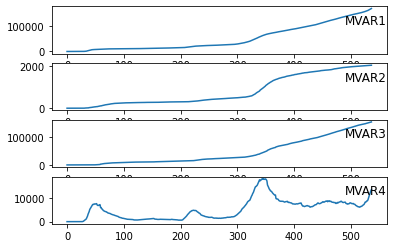

In [5]:
from pandas import read_csv
from matplotlib import pyplot
# ddf["OVAR1"].replace({0: 1, 1: 2, 2: 3, 3: 4,4:5}, inplace=True)
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = ddf.values
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure()
pyplot.rcParams['figure.figsize'] = [13, 10]
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(ddf.columns[group], y=0.5, loc='right')
	i += 1

plt.savefig('4_variables_graph.png')
pyplot.show()

#### **LSTM DATA PREPARATION**

In [6]:
import numpy as np
# ddf = ddf.astype(np.int64)

# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as MAE

dataset = ddf
values = dataset.values

print("Dataset shape after cleaning: ", values.shape)
# X_scaler = MinMaxScaler()
# Y_scaler = MinMaxScaler()
# # X_scaler = MinMaxScaler(feature_range=(0, 1))
# # X_data = X_scaler.fit_transform(values)
# X_data = X_scaler.fit_transform(values)
# Y_data = Y_scaler.fit_transform(dataset[['MVAR1']])

# Y_data = Y_scaler.fit_transform(data[['traffic_volume']]) 

Dataset shape after cleaning:  (537, 7)


In [7]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dataset.values
# integer encode direction
values = values.astype('float32')

# encoder = LabelEncoder()
# values = encoder.fit_transform(values)
# ensure all data is float

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = MinMaxScaler(feature_range=(-1, 1))
# scaler = StandardScaler()
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 7
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
# we will add below line if we just want to forecast one variable for 1 day. 
# reframed.drop(reframed.columns[[51,52,53,54,55,56,57,58,59]], axis=1, inplace=True)
# reframed.drop(reframed.columns[[61,62,63,64,65,66,67,68,69,70,71]], axis=1, inplace=True)
# reframed.drop(reframed.columns[[85,86,87,88,89,90,91,92,93,94,95]], axis=1, inplace=True)
# reframed.drop(reframed.columns[[99,100,101,102,103,104,105,106,107,108,109,110,111]], axis=1, inplace=True)

print(reframed.shape)

# 24 input features and 8 output features 

(534, 28)


In [8]:
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var1(t-2),var2(t-2),var3(t-2),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000006,0.0,0.0,...,0.0,0.0,0.0,0.000012,0.0,0.0,0.000111,0.0,0.0,0.0
4,0.000006,0.0,0.0,0.000055,0.0,0.0,0.0,0.000006,0.0,0.0,...,0.0,0.0,0.0,0.000018,0.0,0.0,0.000166,0.0,0.0,0.0
5,0.000006,0.0,0.0,0.000055,0.0,0.0,0.0,0.000012,0.0,0.0,...,0.0,0.0,0.0,0.000018,0.0,0.0,0.000166,0.0,0.0,0.0
6,0.000012,0.0,0.0,0.000111,0.0,0.0,0.0,0.000018,0.0,0.0,...,0.0,0.0,0.0,0.000018,0.0,0.0,0.000166,0.0,0.0,0.0
7,0.000018,0.0,0.0,0.000166,0.0,0.0,0.0,0.000018,0.0,0.0,...,0.0,0.0,0.0,0.000018,0.0,0.0,0.000166,0.0,0.0,0.0


In [9]:
# split into train and test sets
values = reframed.values
n_train_hours = 480
# n_train_hours = 472
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)


Training data shape:  (480, 28)
Testing data shape:  (54, 28)


In [10]:
# split into input and outputs
n_obs = n_hours * n_features
print(n_obs)
train_X, train_y = train[:, :n_obs], train[:, -7:]
test_X, test_y = test[:, :n_obs], test[:, -7:]
print("Training split shape: ", train_X.shape, len(train_X), train_y.shape)
print("Testing split shape: ", test_X.shape, len(test_X), test_y.shape)


# Here we are taking previous 14 days data so it becomes like 14 * 14 (features) and the output is 14 which is different then the input

21
Training split shape:  (480, 21) 480 (480, 7)
Testing split shape:  (54, 21) 54 (54, 7)


In [11]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# (total data, time steps/total days, total features)

(480, 3, 7) (480, 7) (54, 3, 7) (54, 7)


In [12]:
# Err_Bi=[]
# Err_Lstm=[]
# tries=5

# for i in range(tries):
#     test_y_inter=np.copy(test_y)
#     model = Sequential()
#     model.add(Bidirectional(LSTM(184, return_sequences=True, activation='relu'), input_shape=(train_X.shape[1], train_X.shape[2]), merge_mode="concat"))

#     model.add(Bidirectional(LSTM(164, activation='relu'), merge_mode="concat")) 

#     model.add(Dense(train_y.shape[1]))

#     adam = tf.keras.optimizers.Adam()
#     ear_stop = tf.keras.callbacks.EarlyStopping(
#       monitor='val_loss', patience=100,  # best is 100
#       mode='min', restore_best_weights=True
#     )
#     # rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=30)  # best
#     rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=80)  # factor is 0.4 patience 30
#     model.compile(loss=tf.losses.MeanAbsoluteError(),
#                 metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)


#     history = model.fit(train_X, train_y, epochs=800, callbacks = [ear_stop, rlrop], batch_size=32, validation_data=(test_X, test_y), verbose=0, shuffle=True)  # batch_size  best 108   -> shuffle True
#     yhat = model.predict(test_X)

#     inv_yhat = scaler.inverse_transform(yhat)
#     test_y = test_y.reshape((len(test_y), 7))  # we need to change reshape value here. 
#     inv_y = scaler.inverse_transform(test_y)
#     err_bilstm= MAE(inv_yhat, inv_y)
#     Err_Bi.append(err_bilstm)
#     model.save('model1_relu/BiLstm_pol1_'+str(i)+'.h5')
#     #------------------------------------------------------------------------------------------------------------------
#     model = Sequential()
#     model.add(LSTM(184, activation="relu", return_sequences=True))
# #     model.add(LSTM(184, activation="tanh"))
#     model.add(LSTM(164, activation="relu"))
#     model.add(Dense(train_y.shape[1]))

#     adam = tf.keras.optimizers.Adam()
#     ear_stop = tf.keras.callbacks.EarlyStopping(
#       monitor='val_loss', patience=100,  # best is 100
#       mode='min', restore_best_weights=True
#     )
#     # rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=30)  # best
#     rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.10, patience=100)  # factor is 0.42 patience 30
#     model.compile(loss=tf.losses.MeanAbsoluteError(),
#                 metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)

#     history = model.fit(train_X, train_y, epochs=800, callbacks = [ear_stop, rlrop], batch_size=32, validation_data=(test_X, test_y), verbose=0, shuffle=False)  # batch_size  best 108   -> shuffle false
#     yhat = model.predict(test_X)
#     inv_yhat = scaler.inverse_transform(yhat)
#     test_y = test_y_inter.reshape((len(test_y_inter), 7))  # we need to change reshape value here. 
#     inv_y = scaler.inverse_transform(test_y)
#     err_lstm= MAE(inv_yhat, inv_y)
#     Err_Lstm.append(err_lstm)
#     model.save('model1_relu/Lstm_pol1_'+str(i)+'.h5')

2/2 [==============================] - 0s 4ms/step


2/2 [==============================] - 0s 4ms/step


In [13]:
objective=[x1 - x2 for (x1, x2) in zip(Err_Bi,Err_Lstm)]
index_of_models=objective.index(min(objective))
print(index_of_models)

1


In [14]:
Err_Bi

[1426.8251, 480.81375, 898.00726, 698.62604, 881.43176]

In [14]:
index_of_models = 3
from tensorflow import keras
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as MAE

model_lstm = keras.models.load_model('model1_relu/Lstm_pol1_'+str(index_of_models)+'.h5')
model_bilstm = keras.models.load_model('model1_relu/BiLstm_pol1_'+str(index_of_models)+'.h5')

#---------------------Bi-LSTM---------------------------------------------------
yhat = model_bilstm.predict(test_X)
inv_yhat = scaler.inverse_transform(yhat)
inv_yhat_p = np.copy(inv_yhat)
inv_y = scaler.inverse_transform(test_y)
inv_y_p = np.copy(inv_y)
print("------------------------Bi-LSTM-----------------------------------------------")
mae = MAE(inv_yhat[:,0], inv_y[:,0])
print("Positive MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,0], inv_y[:,0])
print("Positive MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,0], inv_yhat[:,0]))
print('Positive RMSE: %.3f' % rmse)

#--------------------------------------------
mae = MAE(inv_yhat[:,1], inv_y[:,1])
print("Death MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,1], inv_y[:,1])
print("Death MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,1], inv_yhat[:,1]))
print('Death RMSE: %.3f' % rmse)


#--------------------------------------------
mae = MAE(inv_yhat[:,2], inv_y[:,2])
print("Recovered MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,2], inv_y[:,2])
print("Recovered MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,2], inv_yhat[:,2]))
print('Recovered RMSE: %.3f' % rmse)

#--------------------------------------------
mae = MAE(inv_yhat[:,3], inv_y[:,3])
print("Quarantined MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,3], inv_y[:,3])
print("Quarantined MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,3], inv_yhat[:,3]))
print('Quarantined RMSE: %.3f' % rmse)


#---------------------LSTM---------------------------------------------------
yhat = model_lstm.predict(test_X)
inv_yhat = scaler.inverse_transform(yhat)
inv_y = scaler.inverse_transform(test_y)
print("------------------------LSTM-----------------------------------------------")

mae = MAE(inv_yhat[:,0], inv_y[:,0])
print("Positive MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,0], inv_y[:,0])
print("Positive MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,0], inv_yhat[:,0]))
print('Positive RMSE: %.3f' % rmse)

#--------------------------------------------
mae = MAE(inv_yhat[:,1], inv_y[:,1])
print("Death MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,1], inv_y[:,1])
print("Death MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,1], inv_yhat[:,1]))
print('Death RMSE: %.3f' % rmse)


#--------------------------------------------
mae = MAE(inv_yhat[:,2], inv_y[:,2])
print("Recovered MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,2], inv_y[:,2])
print("Recovered MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,2], inv_yhat[:,2]))
print('Recovered RMSE: %.3f' % rmse)

#--------------------------------------------
mae = MAE(inv_yhat[:,3], inv_y[:,3])
print("Quarantined MAE: ", mae)
mape = mean_absolute_percentage_error(inv_yhat[:,3], inv_y[:,3])
print("Quarantined MAPE: ", mape)
rmse = sqrt(mean_squared_error(inv_y[:,3], inv_yhat[:,3]))
print('Quarantined RMSE: %.3f' % rmse)


2/2 [==============================] - 0s 9ms/step
------------------------Bi-LSTM-----------------------------------------------
Positive MAE:  1572.8579
Positive MAPE:  0.01025905
Positive RMSE: 1863.564
Death MAE:  59.79953
Death MAPE:  0.028403156
Death RMSE: 74.608
Recovered MAE:  2517.8838
Recovered MAPE:  0.017977597
Recovered RMSE: 2829.989
Quarantined MAE:  739.7037
Quarantined MAPE:  0.08844504
Quarantined RMSE: 883.286
2/2 [==============================] - 0s 4ms/step
------------------------LSTM-----------------------------------------------
Positive MAE:  1082.7236
Positive MAPE:  0.007112188
Positive RMSE: 1230.191
Death MAE:  70.84166
Death MAPE:  0.03332345
Death RMSE: 96.109
Recovered MAE:  1112.5162
Recovered MAPE:  0.0078375
Recovered RMSE: 1417.844
Quarantined MAE:  1332.6971
Quarantined MAPE:  0.1482906
Quarantined RMSE: 1554.503


15/15 [==============================] - 0s 10ms/step
Train RMSE: 271.030


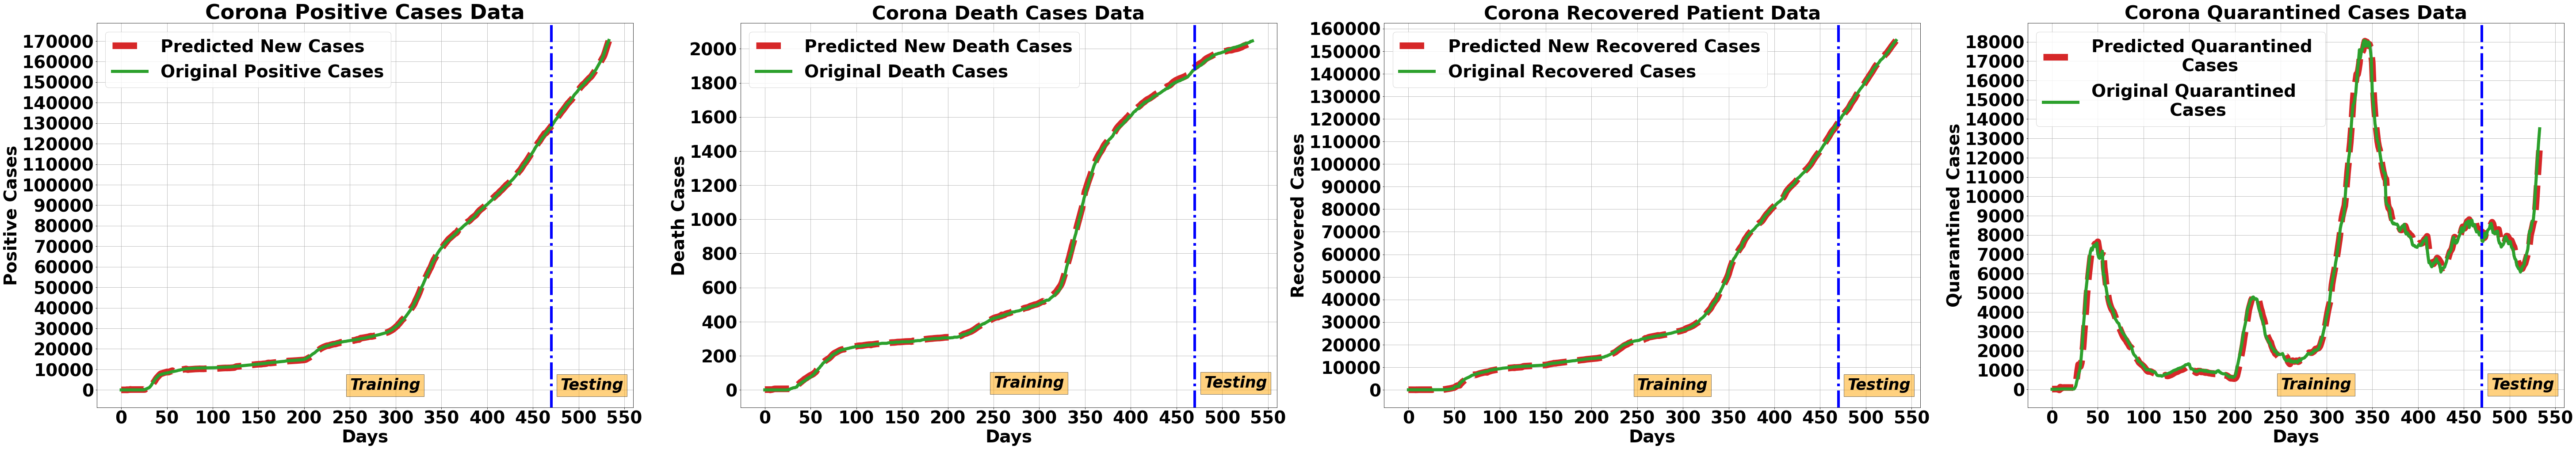

In [13]:
#### *Fitting model on training data*

yhat_train = model_bilstm.predict(train_X)
inv_yhat_train = scaler.inverse_transform(yhat_train)
inv_y_train = scaler.inverse_transform(train_y)
rmse = sqrt(mean_squared_error(inv_y_train[:, 0], inv_yhat_train[:, 0]))
print('Train RMSE: %.3f' % rmse)

## *Combining both training and test data*
comb_d = np.concatenate((inv_y_train, inv_y_p))
comb_p = np.concatenate((inv_yhat_train, inv_yhat_p))

L44 = ["Predicted Positive rate", "Original Positive rate", "Predicted Death rate", "Original Death rate", "Predicted Recovered rate", "Original Recovered rate", "Predicted No of Quarantined", "Original No of Quarantined"]
L41 = ["Positive rate Data", "Death rate Data", "Recovered Patient Data", "No of People Quarantined" ]

L22 = ["Predicted New Cases", "Predicted New Death Cases", "Predicted New Recovered Cases", "Predicted Quarantined \n               Cases"]
L20 = ["Original Positive Cases", "Original Death Cases", "Original Recovered Cases", "Original Quarantined \n             Cases"]
L23 = ["Positive Cases", "Death Cases", "Recovered Cases", "Quarantined Cases" ]
L21 = ["Corona Positive Cases Data", "Corona Death Cases Data", "Corona Recovered Patient Data", "Corona Quarantined Cases Data" ]
L = ["Positive Cases", "Death Cases", "Recovered Cases", "Quarantined Cases"]


from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
# from matplotlib import rc, rcParams

plt.rc('font', size=39)
plt.rc('font', weight='bold')

plt.rcParams["figure.figsize"] = (100,16)

fig, axs = plt.subplots(1, 4)
# fig.suptitle('Horizontally stacked subplots')
axs[0].plot(comb_p[:, 0], color='tab:red', label=L22[0], linestyle='dashed', linewidth=15)
axs[0].plot(comb_d[:, 0], color='tab:green', label=L20[0], linewidth=7)
axs[1].plot(comb_p[:, 1], color='tab:red', label=L22[1], linestyle='dashed', linewidth=15)
axs[1].plot(comb_d[:, 1], color='tab:green', label=L20[1],  linewidth=7)
axs[2].plot(comb_p[:, 2], color='tab:red', label=L22[2], linestyle='dashed', linewidth=15)
axs[2].plot(comb_d[:, 2], color='tab:green', label=L20[2], linewidth=7)
axs[3].plot(comb_p[:, 3], color='tab:red', label=L22[3], linestyle='dashed', linewidth=15)
axs[3].plot(comb_d[:, 3], color='tab:green', label=L20[3],  linewidth=7)


# Adding text on the plot.
axs[0].axvline(x=470, color='b',linewidth=6, linestyle='-.')
axs[1].axvline(x=470, color='b',linewidth=6, linestyle='-.')
axs[2].axvline(x=470, color='b',linewidth=6, linestyle='-.')
axs[3].axvline(x=470, color='b',linewidth=6, linestyle='-.')

axs[0].text(250, 13, 'Training', style='italic', fontsize=35, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 8})
axs[0].text(480, 13, 'Testing', style='italic',fontsize=35, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 8})
axs[1].text(250, 13, 'Training', style='italic',fontsize=35, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 8})
axs[1].text(480, 13, 'Testing', style='italic',fontsize=35, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 8})
axs[2].text(250, 13, 'Training', style='italic', fontsize=35, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 8})
axs[2].text(480, 13, 'Testing', style='italic',fontsize=35, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 8})
axs[3].text(250, 13, 'Training', style='italic', fontsize=35, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 8})
axs[3].text(480, 13, 'Testing', style='italic',fontsize=35, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 8})

axs[0].set_xlabel('Days',fontweight="bold")
axs[0].set_ylabel("Positive Cases",fontweight="bold")
axs[0].set_title(L21[0], fontweight="bold")
axs[0].grid(True)
axs[0].legend(loc='upper left');

plt.rcParams.update({'font.size': 39 })
plt.rc('axes', titlesize=43)     # fontsize of the single axes title
plt.rc('axes', labelsize=45)    # fontsize of the x and y labels

plt.rc('xtick', labelsize=36)    # fontsize of the tick labels
plt.rc('ytick', labelsize=36)    # fontsize of the tick labels

axs[0].locator_params(axis="x", nbins=20)
axs[0].locator_params(axis="y", nbins=20)
axs[1].locator_params(axis="x", nbins=20)
axs[1].locator_params(axis="y", nbins=20)
axs[2].locator_params(axis="x", nbins=20)
axs[2].locator_params(axis="y", nbins=20)
axs[3].locator_params(axis="x", nbins=20)
axs[3].locator_params(axis="y", nbins=20)

# ax.set_xlim([420, 450])
# ax.set_ylim([5000, 9000])

axs[1].set_xlabel('Days',fontweight="bold")
axs[1].set_ylabel("Death Cases", fontweight="bold")
axs[1].set_title(L21[1],fontweight="bold")
axs[1].grid(True)
axs[1].legend(loc='upper left');

axs[2].set_xlabel('Days',fontweight="bold")
axs[2].set_ylabel("Recovered Cases",fontweight="bold")
axs[2].set_title(L21[2], fontweight="bold")
axs[2].grid(True)
axs[2].legend(loc='upper left');

axs[3].set_xlabel('Days',fontweight="bold")
axs[3].set_ylabel("Quarantined Cases",fontweight="bold")
axs[3].set_title(L21[3], fontweight="bold")
axs[3].grid(True)
axs[3].legend(loc='upper left');

plt.savefig("3_policy_output_1.jpg",dpi=200)

15/15 [==============================] - 0s 8ms/step
Train RMSE: 641.849


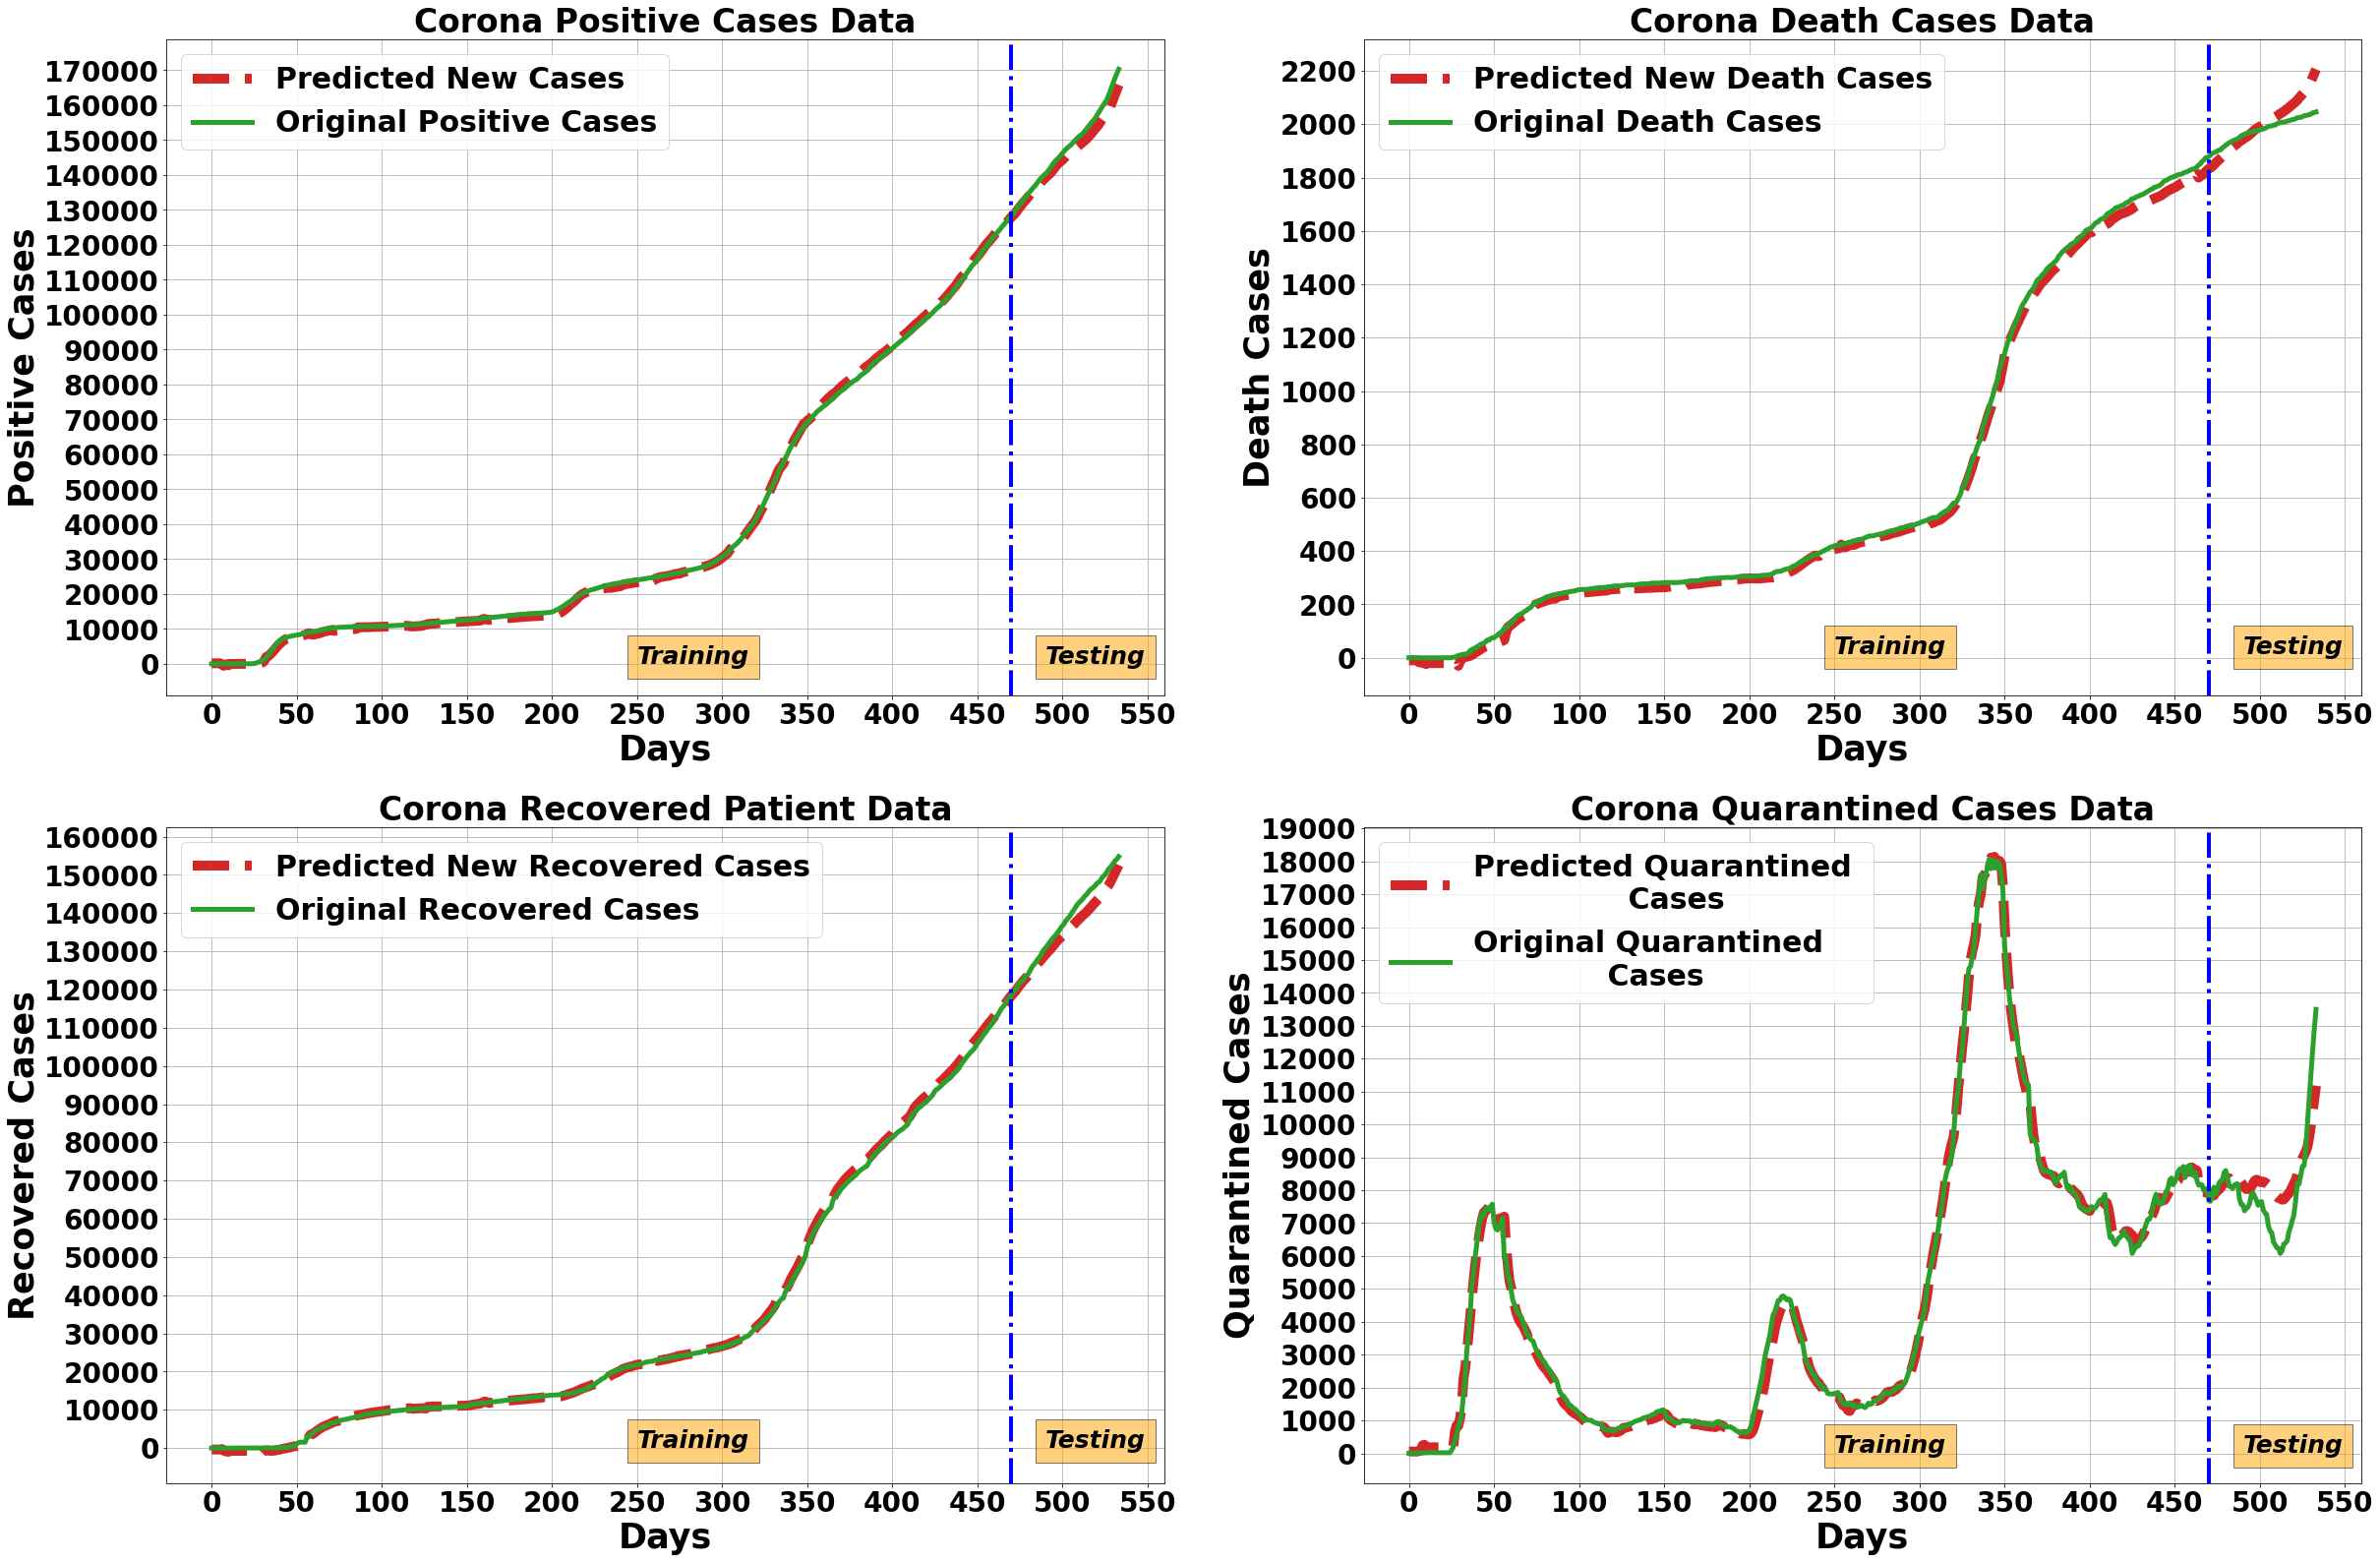

In [20]:
#### *Fitting model on training data*

yhat_train = model_bilstm.predict(train_X)
inv_yhat_train = scaler.inverse_transform(yhat_train)
inv_y_train = scaler.inverse_transform(train_y)
rmse = sqrt(mean_squared_error(inv_y_train[:, 0], inv_yhat_train[:, 0]))
print('Train RMSE: %.3f' % rmse)

## *Combining both training and test data*
comb_d = np.concatenate((inv_y_train, inv_y_p))
comb_p = np.concatenate((inv_yhat_train, inv_yhat_p))

L44 = ["Predicted Positive rate", "Original Positive rate", "Predicted Death rate", "Original Death rate", "Predicted Recovered rate", "Original Recovered rate", "Predicted No of Quarantined", "Original No of Quarantined"]
L41 = ["Positive rate Data", "Death rate Data", "Recovered Patient Data", "No of People Quarantined" ]

L22 = ["Predicted New Cases", "Predicted New Death Cases", "Predicted New Recovered Cases", "Predicted Quarantined \n               Cases"]
L20 = ["Original Positive Cases", "Original Death Cases", "Original Recovered Cases", "Original Quarantined \n             Cases"]
L23 = ["Positive Cases", "Death Cases", "Recovered Cases", "Quarantined Cases" ]
L21 = ["Corona Positive Cases Data", "Corona Death Cases Data", "Corona Recovered Patient Data", "Corona Quarantined Cases Data" ]
L = ["Positive Cases", "Death Cases", "Recovered Cases", "Quarantined Cases"]


from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.rc('font', size=30)
plt.rc('font', weight='bold')

plt.rcParams["figure.figsize"] = (40,27)

fig, axs = plt.subplots(2, 2)
# fig.suptitle('Horizontally stacked subplots')
axs[0, 0].plot(comb_p[:, 0], color='tab:red', label=L22[0], linestyle='dashed', linewidth=10)
axs[0, 0].plot(comb_d[:, 0], color='tab:green', label=L20[0], linewidth=5)
axs[0, 1].plot(comb_p[:, 1], color='tab:red', label=L22[1], linestyle='dashed', linewidth=10)
axs[0, 1].plot(comb_d[:, 1], color='tab:green', label=L20[1],  linewidth=5)
axs[1, 0].plot(comb_p[:, 2], color='tab:red', label=L22[2], linestyle='dashed', linewidth=10)
axs[1, 0].plot(comb_d[:, 2], color='tab:green', label=L20[2], linewidth=5)
axs[1, 1].plot(comb_p[:, 3], color='tab:red', label=L22[3], linestyle='dashed', linewidth=10)
axs[1, 1].plot(comb_d[:, 3], color='tab:green', label=L20[3],  linewidth=5)


# Adding text on the plot.
axs[0, 0].axvline(x=470, color='b',linewidth=4, linestyle='-.')
axs[0, 1].axvline(x=470, color='b',linewidth=4, linestyle='-.')
axs[1, 0].axvline(x=470, color='b',linewidth=4, linestyle='-.')
axs[1, 1].axvline(x=470, color='b',linewidth=4, linestyle='-.')

axs[0, 0].text(250, 13, 'Training', style='italic', fontsize=25, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})
axs[0, 0].text(490, 13, 'Testing', style='italic',fontsize=25, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})
axs[0, 1].text(250, 13, 'Training', style='italic',fontsize=25, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})
axs[0, 1].text(490, 13, 'Testing', style='italic',fontsize=25, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})
axs[1, 0].text(250, 13, 'Training', style='italic', fontsize=25, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})
axs[1, 0].text(490, 13, 'Testing', style='italic',fontsize=25, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})
axs[1, 1].text(250, 13, 'Training', style='italic', fontsize=25, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})
axs[1, 1].text(490, 13, 'Testing', style='italic',fontsize=25, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})


axs[0, 0].set_xlabel('Days',fontweight="bold")
axs[0, 0].set_ylabel("Positive Cases",fontweight="bold")
axs[0, 0].set_title(L21[0],fontweight="bold")
axs[0, 0].grid(True)
axs[0, 0].legend(loc='upper left');

plt.rcParams.update({'font.size': 30})
plt.rc('axes', titlesize=33)     # fontsize of the single axes title
plt.rc('axes', labelsize=35)    # fontsize of the x and y labels

plt.rc('xtick', labelsize=28)    # fontsize of the tick labels
plt.rc('ytick', labelsize=28)    # fontsize of the tick labels

axs[0, 0].locator_params(axis="x", nbins=20)
axs[0, 0].locator_params(axis="y", nbins=20)
axs[0, 1].locator_params(axis="x", nbins=20)
axs[0, 1].locator_params(axis="y", nbins=20)
axs[1, 0].locator_params(axis="x", nbins=20)
axs[1, 0].locator_params(axis="y", nbins=20)
axs[1, 1].locator_params(axis="x", nbins=20)
axs[1, 1].locator_params(axis="y", nbins=20)

# ax.set_xlim([420, 450])
# ax.set_ylim([5000, 9000])

axs[0, 1].set_xlabel('Days',fontweight="bold")
axs[0, 1].set_ylabel("Death Cases",fontweight="bold")
axs[0, 1].set_title(L21[1],fontweight="bold")
axs[0, 1].grid(True)
axs[0, 1].legend(loc='upper left');

axs[1, 0].set_xlabel('Days',fontweight="bold")
axs[1, 0].set_ylabel("Recovered Cases",fontweight="bold")
axs[1, 0].set_title(L21[2],fontweight="bold")
axs[1, 0].grid(True)
axs[1, 0].legend(loc='upper left');

axs[1, 1].set_xlabel('Days',fontweight="bold")
axs[1, 1].set_ylabel("Quarantined Cases",fontweight="bold")
axs[1, 1].set_title(L21[3],fontweight="bold")
axs[1, 1].grid(True)
axs[1, 1].legend(loc='upper left');

plt.savefig("3_policy_output_v1_relu.jpg",dpi=200)

In [ ]:
# index_of_models = 8, 4